 # <span style=color:Crimson>**S06 T01: Tasca dades, probabilitats i estadístiques**</span>
 
 _**OBJETIVOS DE LA ACTIVIDAD**_
 
 * Aprender  utilizar las herramientas de estadística básicas aplicables a un DataFrame
 * Verificar la correlación entre variables de un DF
 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_**DATOS A UTILIZAR**_

Los datos hacen referencia a los lanzamientos realizados por los jugadores de la NBA durante la temporada de 2014-2015. Entre los datos recolectados se contempla información como: quien tomo el lanzamiento, en que parte de la cancha se tomó el lanzamiento, que defensor estaba mas cercano y así una serie de información complementaria referente a cada lanzamiento. 

In [2]:
sport_df = pd.read_csv ('Data\shot_logs.csv', sep = ',')

In [3]:
sport_df.head()

,GAME_ID1,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,01:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,00:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,00:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


 #### <span style=color:Crimson>**EJERCICIO 1**</span>
 
Seleccionar un atributo del conjunto de datos y calcular la moda, mediana, desviación estandard y mediana aritmétca.
 
 **Cálculo de resumen estadístico**

Seleccionaremos el atributo 'SHOT_DIS' que hace referencia a la distancia con respecto a la canasta desde donde se tomaron los lanzamientos

Como primer paso haremos un histograma para ver la distribución en cuanto a la distancia de lanzamiento, con ello nos haremos una idea de los datos que tenemos.

Aparte del calculo estadístico, graficaremos haciendo uso de un BoxPlot, donde podremos ver de forma inmediata el promedio y los Quartiles 25-75%, así como algunosvalores extremos

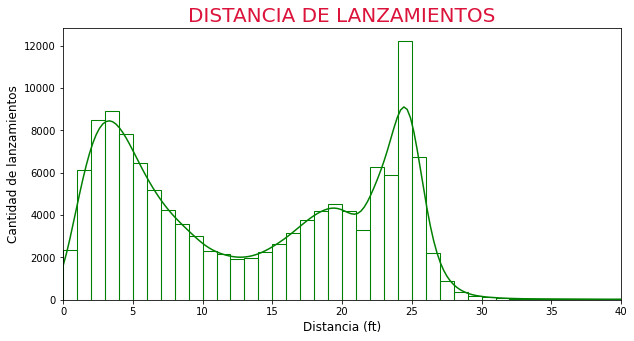

In [15]:
plt.figure (figsize = (10,5))

sns.histplot(data = sport_df['SHOT_DIST'],binwidth = 1, fill=False, kde = True, color ="green")

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'Crimson', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("DISTANCIA DE LANZAMIENTOS", fontdict = fuente_titulo)
plt.xlabel("Distancia (ft)", fontdict = fuente_ejes)
plt.ylabel("Cantidad de lanzamientos", fontdict = fuente_ejes)

plt.xlim (0,40)

plt.show()

_COMENTARIO DEL GRÁFICO_

Gráficamente podemos ver que hay dos zonas preferentes de lanzamiento, sobre los 3 pies (Correspondiente a zonas cercanas a la canasta) y sobre los 24-25 pies (Correspondiente a la zona de 3 punts. A primera vista podemos ver que la moda debería ubicarse sobre los 24 pies y la media entre los 10 y los 15 pies.

**Cálculo estadístico**


In [24]:
mean_shot_dist = sport_df['SHOT_DIST'].mean()
median_shot_dist = sport_df['SHOT_DIST'].median()
mode_shot_dist = sport_df['SHOT_DIST'].mode()[0]
standard_d_shot_dist = sport_df['SHOT_DIST'].std()


In [25]:
print ('RESUMEN ESTADÍSTICO:\nMediana: {}\nModa: {}\nDesviación Estandar: {}\nMean: {}'.format(median_shot_dist,mode_shot_dist,standard_d_shot_dist,mean_shot_dist))


RESUMEN ESTADÍSTICO:
Mediana: 13.7
Moda: 24.4
Desviación Estandar: 8.888963591878186
Mean: 13.57150442339677


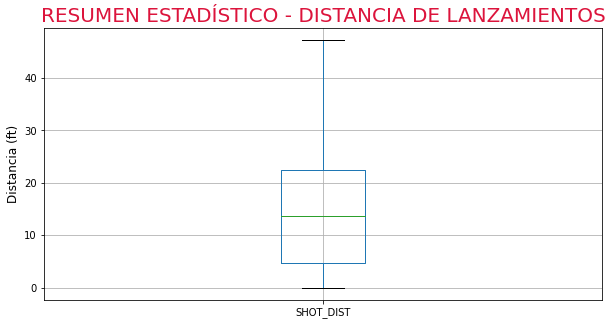

In [30]:
plt.figure (figsize = (10,5))

sport_df.boxplot (column = ['SHOT_DIST'],return_type='axes')

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'Crimson', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("RESUMEN ESTADÍSTICO - DISTANCIA DE LANZAMIENTOS", fontdict = fuente_titulo)
plt.ylabel("Distancia (ft)", fontdict = fuente_ejes)

plt.show()

 _COMENTARIO DEL GRÁFICO_

En este gráfico vemos que la mediana, como se ha calculado, esta sobre los 13 pies y el 50% de los lanzamientos registrados se encuentra aproximadamente entre los 7 pies y los 22 pies
 
 #### <span style=color:Crimson>**EJERCICIO 2**</span>
 
Calcular la correlación entre dos atributos del DF. Al tratarse de correlación es mejor aplicarlo para variables continuas, no variables categóricas.

Veremos si hay alguna correlación entre la disatancia del lanzamiento y la distacia de separación del defensor mas cercano. Para esto tendremos que hacer el siguiente procedimiento:

* Graficar la columna de CLOSE_DEF_DIST respecto a SHOT_RESULT para hacernos una idea de como se comportan ambos valores
* Buscamos el valor de correlación
 


**Grafico de ambas columnas seleccionadas**

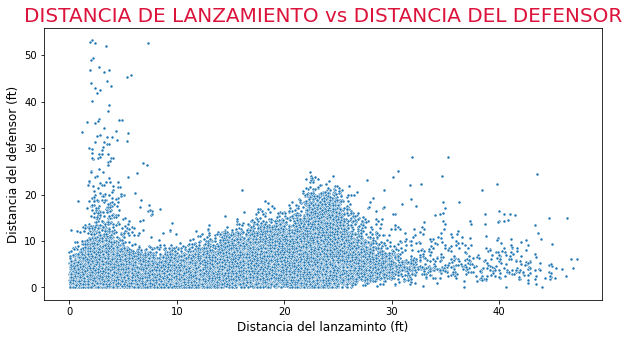

In [37]:
plt.figure (figsize = (10,5))

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'Crimson', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

plt.title("DISTANCIA DE LANZAMIENTO vs DISTANCIA DEL DEFENSOR", fontdict = fuente_titulo)
plt.xlabel("Distancia del lanzaminto (ft)", fontdict = fuente_ejes)
plt.ylabel("Distancia del defensor (ft)", fontdict = fuente_ejes)

sns.scatterplot (data = sport_df, x = 'SHOT_DIST', y = 'CLOSE_DEF_DIST', marker = '.' )

plt.show()

In [39]:
correlation = sport_df['SHOT_DIST'].corr(sport_df['CLOSE_DEF_DIST'])

In [40]:
correlation

0.523191841118245

_COMENTARIO_

La correlación es util aplicarla en variables numericas y continuas. Si introducimos variables categóricas es mejor aplicar otros metodos para identificar la dependencia entre variables. En este caso vemos que la correlación es de 0,52, lo que nos indica que hay una baja correlación positiva.

 #### <span style=color:Crimson>**EJERCICIO 3**</span>
 
Generar una matriz de correlación y graficarla con diferentes colores 



In [41]:
sport_df.corr()

,GAME_ID1,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
GAME_ID1,1.000000,0.001726,0.008129,-0.008921,0.014530,0.002014,-0.000735,-0.000187,0.003418,0.028676,0.006739,-0.008761,-0.008464,0.027937
FINAL_MARGIN,0.001726,1.000000,0.000836,-0.003078,-0.009276,0.011739,0.010788,0.008876,0.024134,0.057165,0.033064,0.058762,0.064784,-0.050825
SHOT_NUMBER,0.008129,0.000836,1.000000,0.654932,-0.032683,0.141100,0.144071,0.011541,0.003054,0.013257,-0.037769,-0.008351,-0.009666,-0.006592
PERIOD,-0.008921,-0.003078,0.654932,1.000000,-0.051796,0.055301,0.046089,0.030080,0.048915,0.011462,-0.010204,-0.014082,-0.008501,0.004790
SHOT_CLOCK,0.014530,-0.009276,-0.032683,-0.051796,1.000000,-0.082771,-0.147688,-0.173026,-0.032809,-0.003289,0.026558,0.096855,0.084173,0.038315
DRIBBLES,0.002014,0.011739,0.141100,0.055301,-0.082771,1.000000,0.914311,-0.082540,-0.169016,0.016915,-0.153674,-0.034390,-0.055689,0.023655
TOUCH_TIME,-0.000735,0.010788,0.144071,0.046089,-0.147688,0.914311,1.000000,-0.085165,-0.181007,0.016225,-0.164737,-0.045299,-0.066736,0.001797
SHOT_DIST,-0.000187,0.008876,0.011541,0.030080,-0.173026,-0.082540,-0.085165,1.000000,0.740933,0.002777,0.523192,-0.191704,-0.069147,-0.024270
PTS_TYPE,0.003418,0.024134,0.003054,0.048915,-0.032809,-0.169016,-0.181007,0.740933,1.000000,0.006266,0.414198,-0.121293,0.030361,0.010486
CLOSEST_DEFENDER_PLAYER_ID,0.028676,0.057165,0.013257,0.011462,-0.003289,0.016915,0.016225,0.002777,0.006266,1.000000,-0.015057,-0.002633,-0.002046,-0.002317


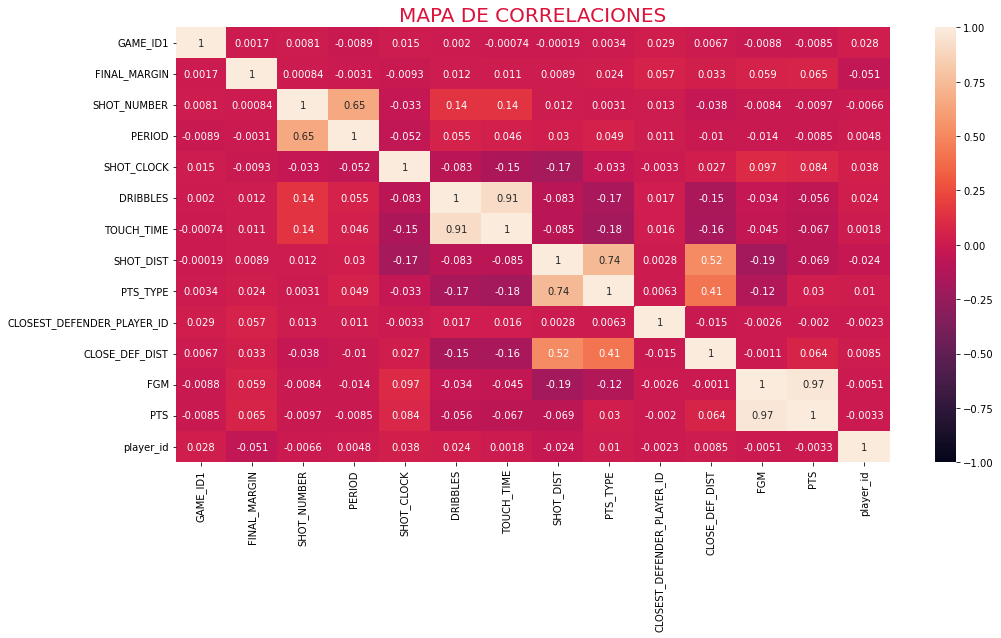

In [44]:
plt.figure(figsize=(16, 8))

fuente_titulo = {'family' : 'DejaVu Sans', 'color' : 'Crimson', 'size' : 20}
fuente_ejes = {'family' : 'DejaVu Sans', 'color' : 'black', 'size' : 12}

correlation_heatmap = sns.heatmap(sport_df.corr(), vmin=-1, vmax=1, annot=True)

correlation_heatmap.set_title('MAPA DE CORRELACIONES', fontdict= fuente_titulo);

_COMENTARIO_

Vemos que la matriz de correlación se genera únicamente sobre variables numéricas. Si cambiamos los valores de SHOT_RESULT a una variable numérica podríamos inluirlas en la matriz de correlación y graficarla. Hy una correlación alta entre SHOT_DIST y PTS_TYPE, que es lógico ya que los puntos de mayor valor (3pts) son los mas alejados de la canasta.